In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Drop any duplicate values
city_data = city_data.drop_duplicates('city')

# Combine the data into a single dataset
pyber_data = ride_data.merge(city_data, on = 'city', how = 'outer')

# Display data
pyber_data.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [2]:
# Obtain the x and y coordinates for each of the three city types

# Create separate data frames for Urban type data, Suburban type data and Rural Type data
urban_city = pyber_data.loc[pyber_data["type"] == "Urban"]
suburban_city = pyber_data.loc[pyber_data["type"] == "Suburban"]
rural_city = pyber_data.loc[pyber_data["type"] == "Rural"]

# For urban cities, calcualte average fair per city
avg_fare_urban_city = urban_city.groupby(['city'])['fare'].mean()

# For urban cities, calculate the total number of rides
total_rides_urban_city = urban_city.groupby(['city']).count()['ride_id']

# For urban cities, calculate the total driver count
total_drivers_urban_city = urban_city.groupby(['city'])['driver_count'].value_counts()

# For Suburban cities, calcualte average fair per city
avg_fare_suburban_city = suburban_city.groupby(['city'])['fare'].mean()

# For Surban cities, calculate the total number of rides
total_rides_suburban_city = suburban_city.groupby(['city']).count()['ride_id']

# For Surban cities, calculate the total driver count
total_drivers_suburban_city = suburban_city.groupby(['city'])['driver_count'].value_counts()

# For Rural cities, calcualte average fair per city
avg_fare_rural_city = rural_city.groupby(['city'])['fare'].mean()

# For Rural cities, calcualte the total driver count
total_rides_rural_city = rural_city.groupby(['city']).count()['ride_id']

# For Rural cities, calculate the total driver count
total_drivers_rural_city = rural_city.groupby(['city'])['driver_count'].value_counts()




## Bubble Plot of Ride Sharing Data

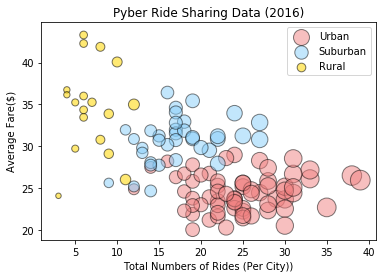

In [3]:
# Build the scatter plots for each city types
plt.scatter(total_rides_urban_city, avg_fare_urban_city,s=total_drivers_urban_city*10,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(total_rides_suburban_city, avg_fare_suburban_city,s=total_drivers_suburban_city*10,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(total_rides_rural_city, avg_fare_rural_city,s=total_drivers_rural_city*10,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.55, label="Rural")


# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")

plt.xlabel("Total Numbers of Rides (Per City))")

plt.ylabel("Average Fare($)")

# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("Pyber Ride Sharing (2016).png")


In [4]:
# Show plot
plt.show()

## Total Fares by City Type

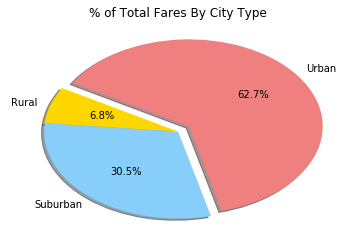

In [5]:
# Calculate Type Percents
total_fare = pyber_data.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Type")
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=150)


# Save Figure
plt.savefig("% of Total Fares By City Type.png")



In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

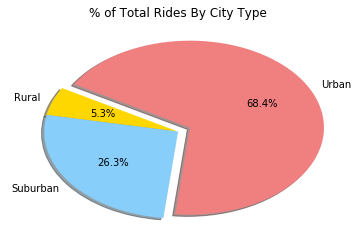

In [7]:
# Calculate Ride Percents
total_rides = pyber_data.groupby(['type'])['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("% of Total Rides By City Type.png")



In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

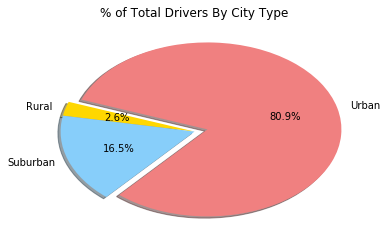

In [9]:
# Calculate Driver Percents 
total_drivers = city_data.groupby(['type'])['driver_count'].sum()


# Build Pie Charts
labels = ["Rural","Suburban","Urban" ]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("% of Total Drivers By City Type.png")



In [10]:
# Show Figure
plt.show()